In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import os


def smooth(vec):
    res = []
    window = 5
    step = 2
    for i in range(window, len(vec)-window, step):
        res.append(np.mean(vec[i-window:i+window+1]))
    return res

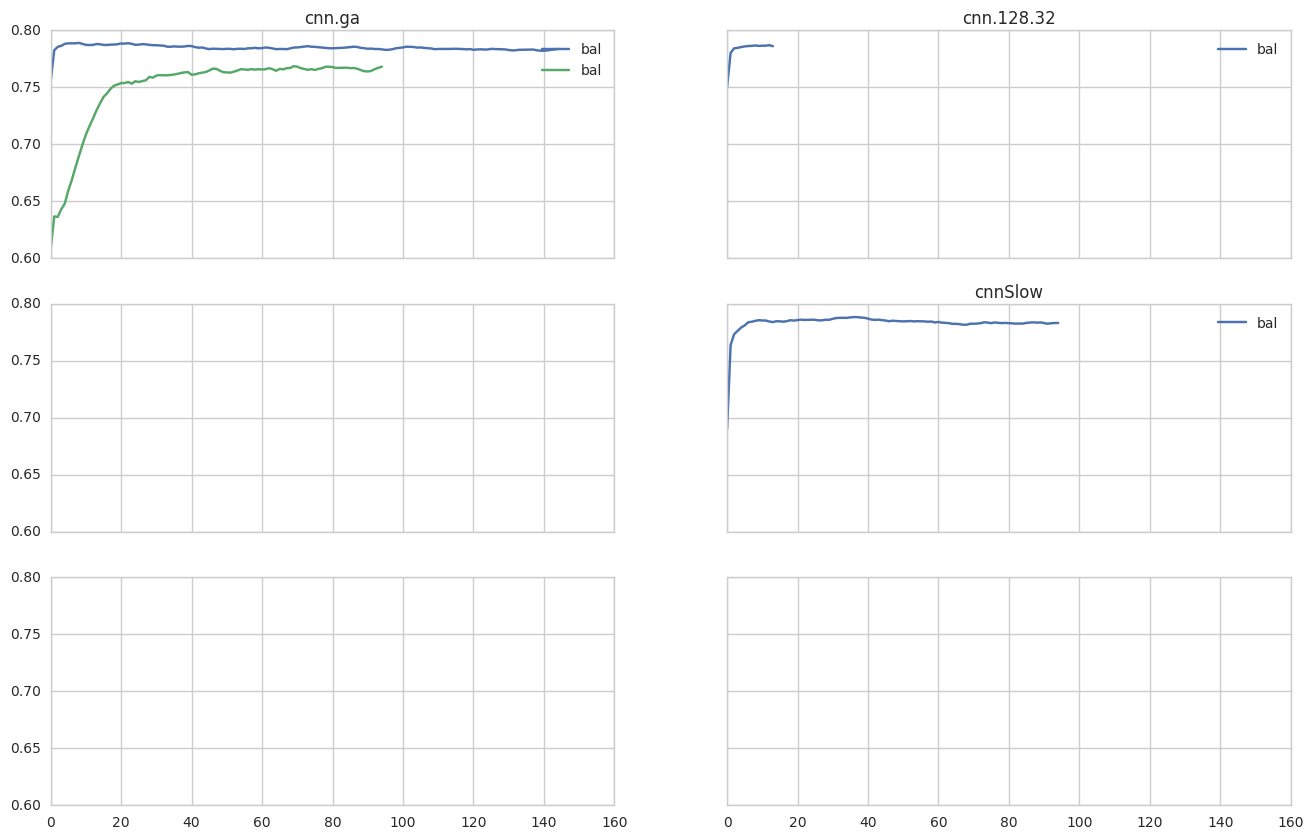

In [2]:
# # no 9mers_imbalanced due to the very poor results

# folders = ["gru_rand", "gru_wei", "gru_wei_b64"]

# models = {}
# approach = {}
# for fold in folders:
#     approach[fold] = {}
#     for subfold in os.listdir(fold):
#         if os.path.isdir(fold + subfold) and not subfold.startswith("."):
#             if subfold not in models:
#                 models[subfold] = {}
#             with open(fold + subfold + "/history.f1.txt") as inp:
#                 data = [float(x) for x in inp.readlines()]
#                 models[subfold][fold] = data
#                 approach[fold][subfold] = data

n_app = 1
n_models = 5

folders = ["cnn_bal", "cnnSlow_bal", "cnn.128.32_bal", "cnn.ga_bal"]

history_files = ["f1"]


metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)
    
    
rows = 3
cols = 2
f, ax = plt.subplots(rows, cols, figsize=(16, 10), sharey=True, sharex=True)
for i, key in enumerate(models):
    for subkey in models[key]:
        r, c = i // rows, i%cols
        ax[r,c].set_title(key)
        ax[r,c].plot(smooth(models[key][subkey]), label = subkey)
        ax[r,c].legend()

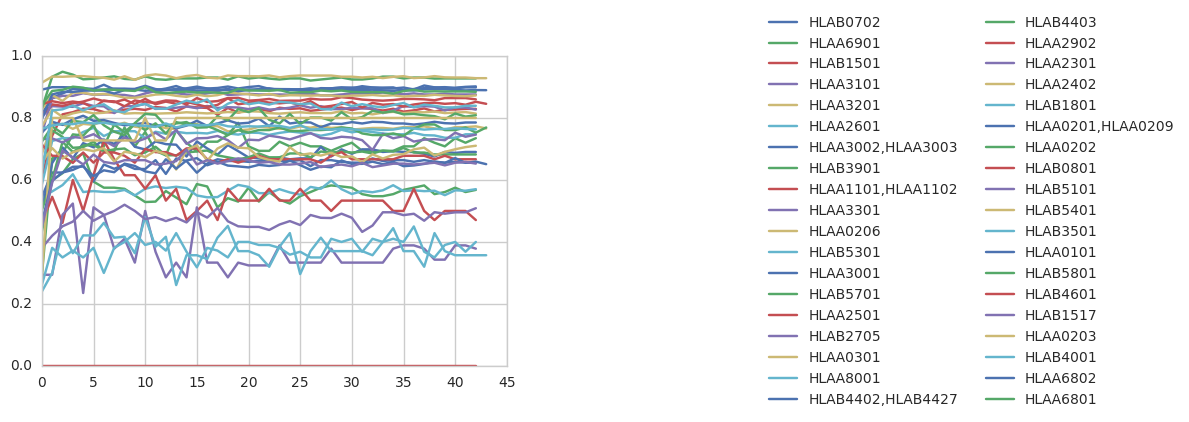

In [12]:
target_folder = "cnn.ga_bal"
target_folder = "cnn.128.64_bal"

f1_vec = {}
for file in os.listdir(target_folder):
    if file.find("HLA") != -1:
        with open(target_folder + "/" + file) as inp:
            f1_vec[file.split(".")[-2]] = [float(x) for x in inp.readlines()]
        
for hla in f1_vec:
    plt.plot(f1_vec[hla], label=hla)
plt.legend()
plt.legend(bbox_to_anchor=(2, .5), loc='center', ncol = 2)